# SciPy
## Author: Gustavo Amarante
SciPy is a collection of mathematical algorithms and convenience functions. In this this notebook there are just a few examples of the features that are most important to us. But if you want to see all that SciPy has to offer, have a look at the [official documentation](https://docs.scipy.org/doc/scipy/reference/).

Since SciPy has several subpackages, it is commom practice to import just the one we are going to use, as you'll in the following examples.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Definite Integrals
The function `quad` is provided to integrate a function of one variable between two points. This functions has 2 outputs, the first one is the computed integral value and the second is an estimate of the absolute error.

In [2]:
import scipy.integrate as integrate

def my_func(x):
    return x**2

integrate.quad(my_func, 0, 2)

(2.666666666666667, 2.960594732333751e-14)

The `quad` functions also allows for infinite limits.

$$
\int_{-\infty}^{\infty} e^{-x^{2}}dx
$$

In [3]:
def my_func(x):
    return np.exp(-x**2)

integrate.quad(my_func, -np.inf, np.inf)

(1.7724538509055159, 1.4202636780944923e-08)

SciPy's `integrate` library also has functions for double and triple integrals. Check them out in the documentations.

# Optimization
The `scipy.optimize` package provides several commonly used optimization algorithms. Here we are going to use just one to illustrate.

Consider that you have 3 assets available. Their expected returns, risks (standard-deviations) and betas are on the table bellow and $\rho$ is the correlation matrix of the returns.

| Asset | Return | Risk | Beta |
|-------|--------|------|------|
|A      |3%      | 10%  | 0.5  |
|B      |3.5%    | 11%  | 1.2  |
|C      |5%      | 15%  | 1.8  |

$$
\rho = 
\begin{bmatrix}
1 & 0.3 & -0.6 \\
0.3 & 1 & 0 \\
-0.6 & 0 & 1 
\end{bmatrix}
$$

Use the `minimize` function to find the weights of each asset that maximizes it's Sharpe index.

In [4]:
retu = np.array([0.03, 0.035, 0.05])
risk = np.array([0.10, 0.11, 0.15])
beta = np.array([0.5, 1.2, 1.8])

corr = np.array([[1, 0.3, -0.6], 
                 [0.3, 1, 0],
                 [-0.6, 0, 1]])

def port_return(w):
    return retu.dot(w)

def port_risk(w):
    covar = np.diag(risk).dot(corr).dot(np.diag(risk))
    return (w.dot(covar).dot(w))**0.5

def port_sharpe(w):
    return -1*(port_return(w) / port_risk(w))   # The -1 is because we want to MINIMIZE the negative of the Sharpe

def port_weight(w):
    return w.sum()

When declaring an optimization problem with inequality restrictions, they have the form of:

$$
\begin{align*}
\min_{w} & f\left(w\right)\\
s.t. & g\left(w\right)\geq0
\end{align*}
$$

In [5]:
from scipy.optimize import minimize

eq_cons = {'type': 'eq',
           'fun' : lambda w: port_weight(w) - 1}

w0 = np.array([1, 0, 0])

res = minimize(port_sharpe, w0, method='SLSQP', constraints=eq_cons, options={'ftol': 1e-9, 'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.7140791324512301
            Iterations: 7
            Function evaluations: 37
            Gradient evaluations: 7


In [6]:
res.x

array([0.54864871, 0.06613309, 0.3852182 ])

In [7]:
res.x.sum()

1.0

In [8]:
-1*res.fun

0.7140791324512301

# Interpolation
There are several general interpolation facilities available in SciPy, for data in 1, 2, and higher dimensions. The `interp1d` funtions grabs data points and returns a function. The default interpolation method is the linear interpolation, but there are several to choose from.

In [9]:
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

In [10]:
f1 = interp1d(x, y)  # linear is the default
f2 = interp1d(x, y, kind='cubic')  # cubic splines
f3 = interp1d(x, y, kind='nearest')  # grab the nearest value
f4 = interp1d(x, y, kind='previous')  # hold last value
f5 = interp1d(x, y, kind='next')  # grab the next value

Now that we have the interpolated function, lets generate more points for the x axis and plot the different methods

In [11]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
xnew

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  ])

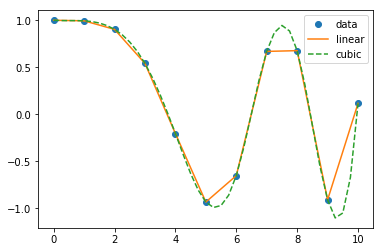

In [12]:
plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

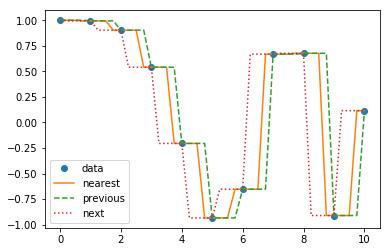

In [13]:
plt.plot(x, y, 'o', xnew, f3(xnew), '-', xnew, f4(xnew), '--', xnew, f5(xnew), ':')
plt.legend(['data', 'nearest', 'previous', 'next'], loc='best')
plt.show()

The `interpolate` sublibrary also has interpolation methods for multivariate data and has **integration with pandas**. Have a look at the documentation.

# Linear Algebra (again)
`scipy.linalg` contains all the functions in `numpy.linalg` plus some more advanced ones.

In [14]:
from scipy import linalg as la

A = np.array([[1,3,5],[2,5,1],[2,3,8]])
la.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

Matrix and vector **norms** can also be computed with SciPy. A wide range of norm definitions are available using different parameters to the order argument of `linalg.norm`.

In [15]:
A = np.array([[1, 2], [3, 4]])
print(la.norm(A))  # frobenius norm is the default.
print(la.norm(A, 1)) # L1 norm (max column sum)
print(la.norm(A, np.inf)) # L inf norm (max row sum)

5.477225575051661
6.0
7.0


Some more advanced matrix decompositions are also available, like the **Schur Decomposition**

In [16]:
la.schur(A)

(array([[-0.37228132, -1.        ],
        [ 0.        ,  5.37228132]]), array([[-0.82456484, -0.56576746],
        [ 0.56576746, -0.82456484]]))

Some notable matrices can also be created, like block **diagonal matrices**.

In [17]:
A = np.array([[1, 0],
              [0, 1]])

B = np.array([[3, 4, 5],
              [6, 7, 8]])

C = np.array([[7]])

la.block_diag(A, B, C)

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 3, 4, 5, 0],
       [0, 0, 6, 7, 8, 0],
       [0, 0, 0, 0, 0, 7]])

# Solving Linear Systems


$$
\begin{align}
x+3y+5 & =10\\
2x+5y+z & =8\\
2x+3y+8z & =3
\end{align}
$$

The system above can be written with matrix notation as $AX=B$ and we know we can find the solution by doing $X=A^{-1}B$, but inverting a matrix is computationally expensive. When solving big linear system it is advised to use the `solve` method.

In [18]:
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
B = np.array([[10], [8], [3]])

Lets check the time that it takes to solve the system in both ways...

In [19]:
la.inv(A).dot(B)

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [20]:
la.solve(A, B)

array([[-9.28],
       [ 5.16],
       [ 0.76]])

let's try with a bigger matrix

In [21]:
import numpy.random as rnd
A = rnd.random((1000, 1000))
B = rnd.random((1000, 1))

In [27]:
%%timeit
la.inv(A).dot(B)

28.8 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%%timeit
la.solve(A, B)

14.9 ms ± 495 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# SciPy
## Author: Gustavo Amarante
SciPy is a collection of mathematical algorithms and convenience functions. In this this notebook there are just a few examples of the features that are most important to us. But if you want to see all that SciPy has to offer, have a look at the [official documentation](https://docs.scipy.org/doc/scipy/reference/).

Since SciPy has several subpackages, it is commom practice to import just the one we are going to use, as you'll in the following examples.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Definite Integrals
The function `quad` is provided to integrate a function of one variable between two points. This functions has 2 outputs, the first one is the computed integral value and the second is an estimate of the absolute error.

In [2]:
import scipy.integrate as integrate

def my_func(x):
    return x**2

integrate.quad(my_func, 0, 2)

(2.666666666666667, 2.960594732333751e-14)

The `quad` functions also allows for infinite limits.

$$
\int_{-\infty}^{\infty} e^{-x^{2}}dx
$$

In [3]:
def my_func(x):
    return np.exp(-x**2)

integrate.quad(my_func, -np.inf, np.inf)

(1.7724538509055159, 1.4202636780944923e-08)

SciPy's `integrate` library also has functions for double and triple integrals. Check them out in the documentations.

# Optimization
The `scipy.optimize` package provides several commonly used optimization algorithms. Here we are going to use just one to illustrate.

Consider that you have 3 assets available. Their expected returns, risks (standard-deviations) and betas are on the table bellow and $\rho$ is the correlation matrix of the returns.

| Asset | Return | Risk | Beta |
|-------|--------|------|------|
|A      |3%      | 10%  | 0.5  |
|B      |3.5%    | 11%  | 1.2  |
|C      |5%      | 15%  | 1.8  |

$$
\rho = 
\begin{bmatrix}
1 & 0.3 & -0.6 \\
0.3 & 1 & 0 \\
-0.6 & 0 & 1 
\end{bmatrix}
$$

Use the `minimize` function to find the weights of each asset that maximizes it's Sharpe index.

In [4]:
retu = np.array([0.03, 0.035, 0.05])
risk = np.array([0.10, 0.11, 0.15])
beta = np.array([0.5, 1.2, 1.8])

corr = np.array([[1, 0.3, -0.6], 
                 [0.3, 1, 0],
                 [-0.6, 0, 1]])

def port_return(w):
    return retu.dot(w)

def port_risk(w):
    covar = np.diag(risk).dot(corr).dot(np.diag(risk))
    return (w.dot(covar).dot(w))**0.5

def port_sharpe(w):
    return -1*(port_return(w) / port_risk(w))   # The -1 is because we want to MINIMIZE the negative of the Sharpe

def port_weight(w):
    return w.sum()

When declaring an optimization problem with inequality restrictions, they have the form of:

$$
\begin{align*}
\min_{w} & f\left(w\right)\\
s.t. & g\left(w\right)\geq0
\end{align*}
$$

In [5]:
from scipy.optimize import minimize

eq_cons = {'type': 'eq',
           'fun' : lambda w: port_weight(w) - 1}

w0 = np.array([1, 0, 0])

res = minimize(port_sharpe, w0, method='SLSQP', constraints=eq_cons, options={'ftol': 1e-9, 'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.7140791324512301
            Iterations: 7
            Function evaluations: 37
            Gradient evaluations: 7


In [6]:
res.x

array([0.54864871, 0.06613309, 0.3852182 ])

In [7]:
res.x.sum()

1.0

In [8]:
-1*res.fun

0.7140791324512301

# Interpolation
There are several general interpolation facilities available in SciPy, for data in 1, 2, and higher dimensions. The `interp1d` funtions grabs data points and returns a function. The default interpolation method is the linear interpolation, but there are several to choose from.

In [9]:
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

In [10]:
f1 = interp1d(x, y)  # linear is the default
f2 = interp1d(x, y, kind='cubic')  # cubic splines
f3 = interp1d(x, y, kind='nearest')  # grab the nearest value
f4 = interp1d(x, y, kind='previous')  # hold last value
f5 = interp1d(x, y, kind='next')  # grab the next value

Now that we have the interpolated function, lets generate more points for the x axis and plot the different methods

In [11]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
xnew

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  ])

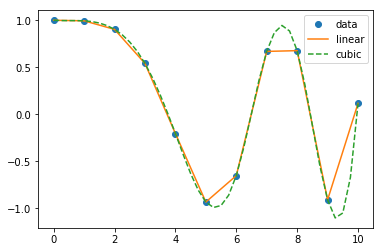

In [12]:
plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

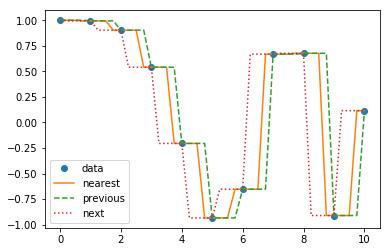

In [13]:
plt.plot(x, y, 'o', xnew, f3(xnew), '-', xnew, f4(xnew), '--', xnew, f5(xnew), ':')
plt.legend(['data', 'nearest', 'previous', 'next'], loc='best')
plt.show()

The `interpolate` sublibrary also has interpolation methods for multivariate data and has **integration with pandas**. Have a look at the documentation.

# Linear Algebra (again)
`scipy.linalg` contains all the functions in `numpy.linalg` plus some more advanced ones.

In [14]:
from scipy import linalg as la

A = np.array([[1,3,5],[2,5,1],[2,3,8]])
la.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

Matrix and vector **norms** can also be computed with SciPy. A wide range of norm definitions are available using different parameters to the order argument of `linalg.norm`.

In [15]:
A = np.array([[1, 2], [3, 4]])
print(la.norm(A))  # frobenius norm is the default.
print(la.norm(A, 1)) # L1 norm (max column sum)
print(la.norm(A, np.inf)) # L inf norm (max row sum)

5.477225575051661
6.0
7.0


Some more advanced matrix decompositions are also available, like the **Schur Decomposition**

In [16]:
la.schur(A)

(array([[-0.37228132, -1.        ],
        [ 0.        ,  5.37228132]]), array([[-0.82456484, -0.56576746],
        [ 0.56576746, -0.82456484]]))

Some notable matrices can also be created, like block **diagonal matrices**.

In [17]:
A = np.array([[1, 0],
              [0, 1]])

B = np.array([[3, 4, 5],
              [6, 7, 8]])

C = np.array([[7]])

la.block_diag(A, B, C)

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 3, 4, 5, 0],
       [0, 0, 6, 7, 8, 0],
       [0, 0, 0, 0, 0, 7]])

# Solving Linear Systems


$$
\begin{align}
x+3y+5 & =10\\
2x+5y+z & =8\\
2x+3y+8z & =3
\end{align}
$$

The system above can be written with matrix notation as $AX=B$ and we know we can find the solution by doing $X=A^{-1}B$, but inverting a matrix is computationally expensive. When solving big linear system it is advised to use the `solve` method.

In [18]:
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
B = np.array([[10], [8], [3]])

Lets check the time that it takes to solve the system in both ways...

In [19]:
la.inv(A).dot(B)

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [20]:
la.solve(A, B)

array([[-9.28],
       [ 5.16],
       [ 0.76]])

let's try with a bigger matrix

In [21]:
import numpy.random as rnd
A = rnd.random((1000, 1000))
B = rnd.random((1000, 1))

In [27]:
%%timeit
la.inv(A).dot(B)

28.8 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%%timeit
la.solve(A, B)

14.9 ms ± 495 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
